# Digits Recognition

In [1]:
from sklearn import datasets
from sklearn import svm

In [2]:
digits=datasets.load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
digits.data=digits.data.astype(digits.images.dtype)/16

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, stratify=digits.target, random_state=42)

In [6]:
import numpy as np

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))*16

In [7]:
digits.data

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

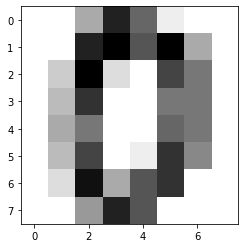

In [8]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[0],cmap='binary')
plt.show()

In [18]:
import cv2
cv2.imwrite('image0.jpg', digits.images[0])

True

In [19]:
def plot_multi(i):
    '''Plots 16 digits, starting with digit i'''
    nplots = 16
    fig = plt.figure(figsize=(15,15))
    for j in range(nplots):
        #subplot(nrows, ncols, index, **kwargs)
        plt.subplot(4,4,j+1)
        plt.imshow(digits.images[i+j], cmap='binary')
        plt.title(digits.target[i+j])
        plt.axis('off')
    plt.show()

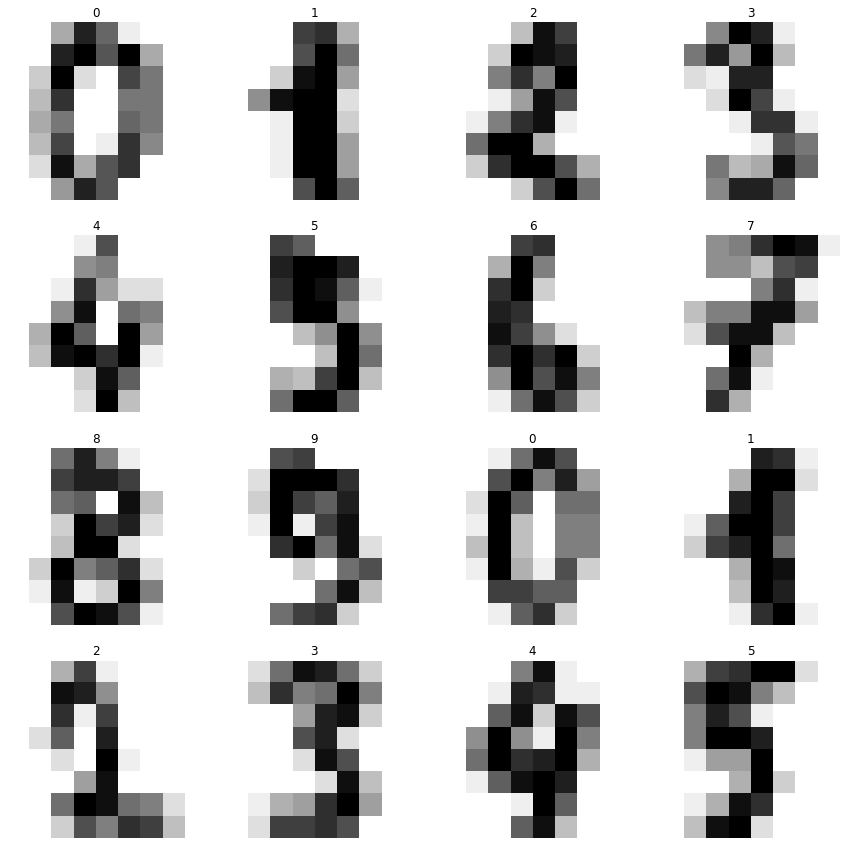

In [20]:
plot_multi(0)

In [21]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [22]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(15,), activation='logistic', alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=1,
                    learning_rate_init=.1, verbose=True)

In [23]:
mlp.fit(X_train,y_train)

Iteration 1, loss = 2.32728651
Iteration 2, loss = 2.27976483
Iteration 3, loss = 2.23955875
Iteration 4, loss = 2.18194763
Iteration 5, loss = 2.10397776
Iteration 6, loss = 1.99801343
Iteration 7, loss = 1.86005463
Iteration 8, loss = 1.70069265
Iteration 9, loss = 1.53322471
Iteration 10, loss = 1.37082743
Iteration 11, loss = 1.21697053
Iteration 12, loss = 1.08602866
Iteration 13, loss = 0.97132327
Iteration 14, loss = 0.87307250
Iteration 15, loss = 0.79090773
Iteration 16, loss = 0.71918555
Iteration 17, loss = 0.65894760
Iteration 18, loss = 0.60632414
Iteration 19, loss = 0.56193029
Iteration 20, loss = 0.52182034
Iteration 21, loss = 0.48731396
Iteration 22, loss = 0.45664419
Iteration 23, loss = 0.42996306
Iteration 24, loss = 0.40547424
Iteration 25, loss = 0.38364204
Iteration 26, loss = 0.36321158
Iteration 27, loss = 0.34632083
Iteration 28, loss = 0.33053289
Iteration 29, loss = 0.31649452
Iteration 30, loss = 0.30251471
Iteration 31, loss = 0.29100098
Iteration 32, los

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(15,),
              learning_rate_init=0.1, random_state=1, solver='sgd',
              verbose=True)

In [24]:
print('The accuracy on the training subset: {:.3f}'.format(mlp.score(X_train, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(mlp.score(X_test, y_test)))

The accuracy on the training subset: 0.998
The accuracy on the test subset: 0.964


In [25]:
clf=svm.SVC(gamma=0.1)
clf.fit(X_train,y_train)
print('The accuracy on the training subset: {:.3f}'.format(clf.score(X_train, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(clf.score(X_test, y_test)))

The accuracy on the training subset: 0.998
The accuracy on the test subset: 0.989


In [26]:
#64 is mean 64 pixel which are 8,8
digits.data.shape

(1797, 64)

In [27]:
print(digits.data[6])

[0.     0.     0.     0.75   0.8125 0.     0.     0.     0.     0.
 0.3125 1.     0.5    0.     0.     0.     0.     0.     0.8125 1.
 0.1875 0.     0.     0.     0.     0.     0.875  0.8125 0.     0.
 0.     0.     0.     0.     0.9375 0.75   0.4375 0.125  0.     0.
 0.     0.     0.8125 1.     0.8125 1.     0.1875 0.     0.     0.
 0.4375 1.     0.6875 0.9375 0.5    0.     0.     0.     0.0625 0.5625
 0.9375 0.6875 0.1875 0.    ]


In [28]:
prediction=mlp.predict([digits.data[6]])

In [29]:
print(prediction)

[6]


In [30]:
#!pip install opencv-python

In [31]:
import cv2
import skimage
import numpy as np
from scipy import misc
img = cv2.imread('numbersix.png')
#img = cv2.equalizeHist(img)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray = cv2.GaussianBlur(img_gray, (5, 5), 0)
#img=skimage.util.img_as_ubyte(img)
resized_image = cv2.resize(img_gray, (8,8))
scaled_image = resized_image.astype(digits.images.dtype)/255.0
#scaled_image=NormalizeData(scaled_image)
scaled_image=np.array(scaled_image)

"""
Image_Array=[]
for eachrow in scaled_image:
    for eachpixel in eachrow:
        Image_Array.append(eachpixel)#to get the average as gray scale
"""


'\nImage_Array=[]\nfor eachrow in scaled_image:\n    for eachpixel in eachrow:\n        Image_Array.append(eachpixel)#to get the average as gray scale\n'

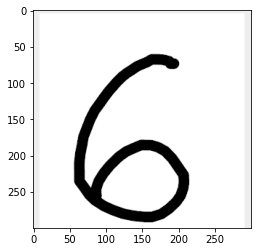

In [32]:
import matplotlib.pyplot as plt
plt.imshow(img,cmap='binary')
plt.show()

In [33]:
digits.data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

In [34]:
scaled_image=scaled_image.flatten()

In [35]:
scaled_image.shape

(64,)

In [36]:
scaled_image

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.3254902 ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.71372549, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.10196078, 1.        , 1.        , 0.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 1.        , 1.        , 1.        ])

In [37]:
prediction=clf.predict([scaled_image])

In [38]:
prediction

array([7])

In [39]:
realimg = cv2.imread('image0.jpg')
print(realimg.shape)
img_gray = cv2.cvtColor(realimg, cv2.COLOR_BGR2GRAY)
#img_blur = cv2.GaussianBlur(img_gray, (5, 5), 0)
resized_image = cv2.resize(img_gray, (8,8))
print(resized_image.shape)

(8, 8, 3)
(8, 8)


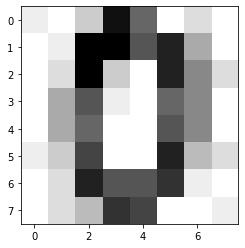

In [40]:
import matplotlib.pyplot as plt
plt.imshow(resized_image,cmap='binary')
plt.show()

In [41]:
resized_image

array([[ 1,  0,  3, 14,  9,  0,  2,  0],
       [ 0,  1, 15, 15, 10, 13,  5,  0],
       [ 0,  2, 15,  3,  0, 13,  7,  2],
       [ 0,  5, 10,  1,  0,  9,  7,  0],
       [ 0,  5,  9,  0,  0, 10,  7,  0],
       [ 1,  3, 11,  0,  0, 13,  4,  2],
       [ 0,  2, 13, 10, 10, 12,  1,  0],
       [ 0,  2,  4, 12, 11,  0,  0,  1]], dtype=uint8)

In [42]:
scaled_image = resized_image.astype(digits.images.dtype)/16.0
scaled_image=np.array(scaled_image)
realimg=scaled_image.flatten()

In [44]:
realimg

array([0.0625, 0.    , 0.1875, 0.875 , 0.5625, 0.    , 0.125 , 0.    ,
       0.    , 0.0625, 0.9375, 0.9375, 0.625 , 0.8125, 0.3125, 0.    ,
       0.    , 0.125 , 0.9375, 0.1875, 0.    , 0.8125, 0.4375, 0.125 ,
       0.    , 0.3125, 0.625 , 0.0625, 0.    , 0.5625, 0.4375, 0.    ,
       0.    , 0.3125, 0.5625, 0.    , 0.    , 0.625 , 0.4375, 0.    ,
       0.0625, 0.1875, 0.6875, 0.    , 0.    , 0.8125, 0.25  , 0.125 ,
       0.    , 0.125 , 0.8125, 0.625 , 0.625 , 0.75  , 0.0625, 0.    ,
       0.    , 0.125 , 0.25  , 0.75  , 0.6875, 0.    , 0.    , 0.0625])

In [43]:
mlp.predict([realimg])

array([0])